![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

Does increased electric vehicle sales lead to more public or private charging ports?

- How many vehicles were sold in 2018 in total? Save the answer as a numeric variable called ev_sales_2018.
- Plot trends for private ports, public ports, and sales, saving this as fig, ax objects.
- Did vehicle sales and number of private and public ports show the same trend (either increasing or decreasing) between the years 2015 and 2018? Save your answer as same or different to a variable called trend.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
private_ev_charging = pd.read_csv("private_ev_charging.csv")
public_ev_charging = pd.read_csv("public_ev_charging.csv")
ev_sales = pd.read_csv("ev_sales.csv")

In [4]:
for dataframe in [private_ev_charging, public_ev_charging, ev_sales]:
    dataframe.info()
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       9 non-null      int64
 1   private_ports              9 non-null      int64
 2   private_station_locations  9 non-null      int64
dtypes: int64(3)
memory usage: 348.0 bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   year                      10 non-null     int64
 1   public_ports              10 non-null     int64
 2   public_station_locations  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  --

In [6]:
df_combined = pd.merge(private_ev_charging, public_ev_charging, on='year', how='outer', indicator=True)
df_combined

,year,private_ports,private_station_locations,public_ports,public_station_locations,_merge
0,2013,NaN,NaN,16619,6938,right_only
1,2014,3695.0,1825.0,22470,9207,both
2,2015,4150.0,1962.0,26532,10710,both
3,2016,5763.0,2331.0,33165,13150,both
4,2017,6048.0,2370.0,45789,16170,both
5,2018,6812.0,2489.0,56842,19893,both
6,2019,9955.0,3078.0,73838,23282,both
7,2020,10647.0,2768.0,96190,28602,both
8,2021,18867.0,4074.0,114451,46407,both
9,2022,19993.0,4435.0,136513,53764,both


In [7]:
df_temp = df_combined[df_combined['_merge'] == 'both']
df_temp.drop(columns=['_merge'], inplace=True)

/tmp/ipykernel_36419/2620151472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(columns=['_merge'], inplace=True)


### Pytanie 1

 How many vehicles were sold in 2018 in total? Save the answer as a numeric variable called ev_sales_2018.

In [20]:
df_grouped = ev_sales.groupby('year', as_index=False).agg(
    total_count = ('sales', 'sum')
)
df_grouped

,year,total_count
0,2011,17763.0
1,2012,53171.0
2,2013,97102.0
3,2014,118882.0
4,2015,114023.0
5,2016,159616.0
6,2017,195581.0
7,2018,361315.0
8,2019,326644.0


In [22]:
df_grouped.query("year == 2018")

,year,total_count
7,2018,361315.0


### Pytanie 2

Plot trends for private ports, public ports, and sales, saving this as fig, ax objects.

In [24]:
df_complete = pd.merge(df_temp, df_grouped, how='left', on='year')
df_complete.dropna(subset='total_count', inplace=True)
df_complete

,year,private_ports,private_station_locations,public_ports,public_station_locations,total_count
0,2014,3695.0,1825.0,22470,9207,118882.0
1,2015,4150.0,1962.0,26532,10710,114023.0
2,2016,5763.0,2331.0,33165,13150,159616.0
3,2017,6048.0,2370.0,45789,16170,195581.0
4,2018,6812.0,2489.0,56842,19893,361315.0
5,2019,9955.0,3078.0,73838,23282,326644.0


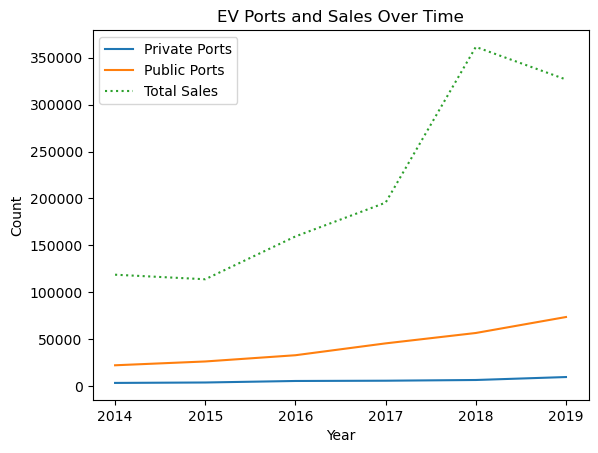

In [26]:
fig, ax = plt.subplots()

sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_complete, x='year', y='total_count', label='Total Sales', linestyle=':')

# Adding titles and labels
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')

# Show the legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

### Pytanie 3

Did vehicle sales and number of private and public ports show the same trend (either increasing or decreasing) between the years 2015 and 2018? Save your answer as same or different to a variable called trend.

In [ ]:
trend = "same"

# Solution

   year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0
5  2016  159616.0
6  2017  195581.0
7  2018  361315.0
8  2019  326644.0


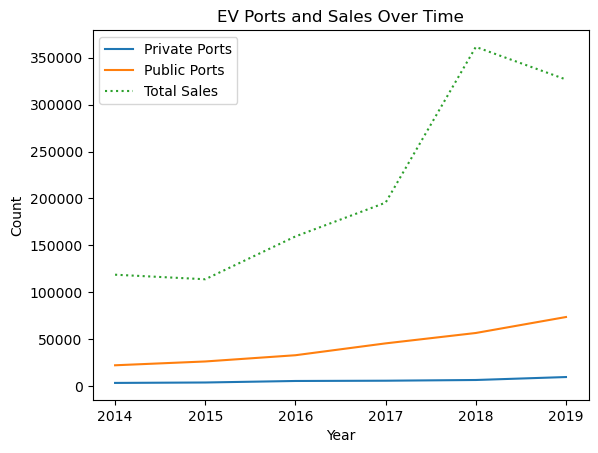

In [27]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
private_ev_charging = pd.read_csv("private_ev_charging.csv")
public_ev_charging = pd.read_csv("public_ev_charging.csv")
ev_sales = pd.read_csv("ev_sales.csv")

# Perform an outer join to keep only the rows with complete information
df_combined = private_ev_charging.merge(public_ev_charging, on='year', how='outer', indicator=True)
df_temp = df_combined[df_combined['_merge'] == 'both']

# Drop the _merge column as it's no longer needed
df_temp = df_temp.drop(columns=['_merge'])

# Get total sales grouping by each year
ev_total_sales = ev_sales.groupby('year')['sales'].sum().reset_index()

# Inspect the data and save the variable
print(ev_total_sales)
ev_sales_2018 = 361315

# Left-join with sales
df_complete = df_temp.merge(ev_total_sales, how='left', on='year')

# Drop any rows with null values
df_complete = df_complete.dropna(subset="sales")

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each line
sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_complete, x='year', y='sales', label='Total Sales', linestyle=':')

# Adding titles and labels
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')

# Show the legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

# Did vehicle sales and number of private and public ports show the same trend?
trend = "same"